In [1]:
%matplotlib inline
import psluncert

# Thermal Expansion Coefficient
## Example E13 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)


### Gaussian Inputs

E13 first gives the calculation assuming all Gaussian inputs. It computes mean value and expanded uncertainties at 95% and 99% coverage.

In [2]:
expansion = '(L1-L0)/(L0*(T1-T0))'

inputs = [{'name': 'L0', 'nom':1.4999, 'uncerts': [{'name': 'uL0', 'std':.0001}]},
          {'name': 'T0', 'nom':288.15, 'uncerts': [{'name': 'uT0', 'std':.02}]},
          {'name': 'L1', 'nom':1.5021, 'uncerts': [{'name': 'uL1', 'std':.0002}]},
          {'name': 'T1', 'nom':373.10, 'uncerts': [{'name': 'uT1', 'std':.05}]}]
u = psluncert.UncertCalc(expansion, inputs=inputs)
display(u.calculate(intervals=[0.95, 0.99]))
display(u.out.report_expanded())




Method            |Mean      |Standard Uncertainty 
------------------|----------|---------------------
GUM Approximation |0.0000173 |1.8e-06              
Monte Carlo       |0.0000173 |1.8e-06              



### GUM Approximation


Interval |Min       |Max       |k     |Deg. Freedom |Expanded Uncertainty 
---------|----------|----------|------|-------------|---------------------
99.00%   |0.0000127 |0.0000218 |2.576 |inf          |4.5e-06              
95.00%   |0.0000138 |0.0000207 |1.960 |inf          |3.4e-06              
90.00%   |0.0000144 |0.0000202 |1.645 |inf          |2.9e-06              
68.00%   |0.0000155 |0.0000190 |0.994 |inf          |1.7e-06              

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min       |Max       |k     
---------|----------|----------|------
99.00%   |0.0000128 |0.0000218 |2.573 
95.00%   |0.0000138 |0.0000207 |1.961 
90.00%   |0.0000144 |0.0000202 |1.645 
68.00%   |0.0000155 |0.0000190 |0.995 



---
### Student Inputs
Next, the example supposes the inputs are t-distributions with 3 degrees of freedom, and recalculates.

In [3]:
inputs = [{'name': 'L0', 'nom':1.4999, 'uncerts': [{'name': 'uL0', 'dist':'t', 'unc':.0001, 'df':3}]},
          {'name': 'T0', 'nom':288.15, 'uncerts': [{'name': 'uT0', 'dist':'t', 'unc':.02,   'df':3}]},
          {'name': 'L1', 'nom':1.5021, 'uncerts': [{'name': 'uL1', 'dist':'t', 'unc':.0002, 'df':3}]},
          {'name': 'T1', 'nom':373.10, 'uncerts': [{'name': 'uT1', 'dist':'t', 'unc':.05,   'df':3}]}]
u = psluncert.UncertCalc(expansion, inputs=inputs)
display(u.calculate())
u.out.report_expanded(conflist=[0.95, 0.99])




Method            |Mean      |Standard Uncertainty 
------------------|----------|---------------------
GUM Approximation |0.0000173 |1.8e-06              
Monte Carlo       |0.0000173 |1.7e-06              



### GUM Approximation


Interval |Min       |Max       |k     |Deg. Freedom |Expanded Uncertainty 
---------|----------|----------|------|-------------|---------------------
99.00%   |9.7e-06   |0.0000249 |4.321 |4.42         |7.6e-06              
95.00%   |0.0000126 |0.0000220 |2.676 |4.42         |4.7e-06              
90.00%   |0.0000136 |0.0000209 |2.075 |4.42         |3.6e-06              
68.00%   |0.0000153 |0.0000192 |1.120 |4.42         |2.0e-06              

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min       |Max       |k     
---------|----------|----------|------
99.00%   |0.0000115 |0.0000230 |3.283 
95.00%   |0.0000140 |0.0000205 |1.875 
90.00%   |0.0000148 |0.0000197 |1.417 
68.00%   |0.0000160 |0.0000186 |0.743 



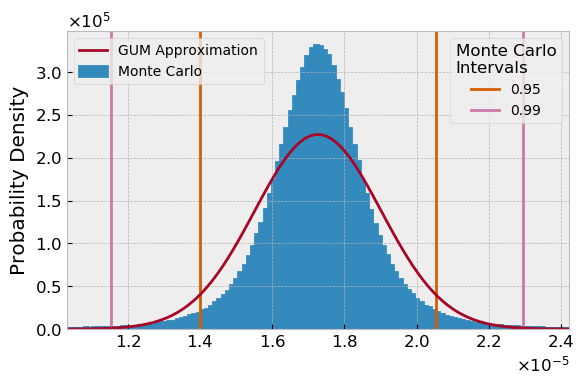

In [4]:
u.out.plot_pdf(intervals=[.95, .99]);